# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/



# Imports

In [77]:
import numpy as np
import pandas as pd

# Exploratory Data Analysis

In [78]:
df = pd.read_csv('moviereviews.csv')

In [79]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [80]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [81]:
df = df.dropna()

In [82]:
df = df.drop(df[df['review'].str.isspace()].index)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [84]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

# Getting top 20 "stop words" by frequency

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
cv = CountVectorizer(stop_words=["english"])

In [87]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('the', 33759), ('and', 15007), ('to', 14832), ('of', 14812), ('is', 10791), ('in', 9703), ('that', 7458), ('it', 7420), ('with', 4745), ('as', 4699), ('this', 4694), ('for', 4503), ('film', 4063), ('but', 3965), ('his', 3877), ('he', 3809), ('on', 3526), ('movie', 3131), ('are', 3102), ('be', 3008)]


In [88]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('the', 39883), ('and', 19023), ('of', 17916), ('to', 15926), ('is', 13572), ('in', 11263), ('it', 7893), ('that', 7755), ('as', 6188), ('with', 5616), ('his', 5395), ('for', 5040), ('film', 5002), ('he', 4744), ('this', 4378), ('but', 4286), ('are', 3583), ('on', 3583), ('by', 3345), ('an', 2956)]


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = df['review']
y = df['label']

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101)

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [93]:
pipe = Pipeline([('vectorizer',TfidfVectorizer()),('model',LogisticRegression())])
pipe.steps
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [94]:
preds = pipe.predict(X_test)

In [97]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [98]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.80      0.85      0.82       191
         pos       0.84      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



In [99]:
confusion_matrix(y_test,preds)

array([[162,  29],
       [ 41, 156]], dtype=int64)

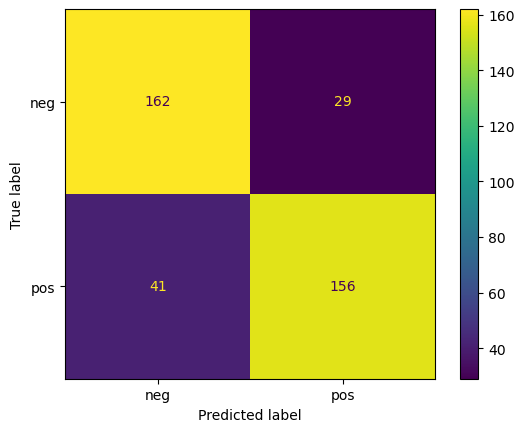

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test,preds)